# Customer Churn

[Customer churn](https://en.wikipedia.org/wiki/Customer_attrition), also known as customer attrition, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

![customer-churn-edit](https://user-images.githubusercontent.com/19235560/65765885-0be51180-e147-11e9-84fc-a1b5cf82ecbf.jpeg)


Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# DATA

In [2]:
#importing dataset
df=pd.read_csv("Telecom_customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data overview

In [4]:
#lets prints name of columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
#Shape of dataset
df.shape

(7043, 21)

#### Our datasets has 7043 rows , 21 columns and 19 features with three numerical features (tenure,MonthlyCharges and TotalCharges) and  16 categorical features

# Data Analysis

In [7]:
#Lets know about numerical data
#converting data types of TotalCharges to float
df['TotalCharges'] = df['TotalCharges'].replace(" ",0).astype('float32')
# lets know summary statistics of numerical data
df1=df[["tenure","MonthlyCharges","TotalCharges"]]
df1.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.732178
std,24.559481,30.090047,2266.794434
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.549988
50%,29.000000,70.350000,1394.550049
75%,55.000000,89.850000,3786.599976
max,72.000000,118.750000,8684.799805


                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.826178
MonthlyCharges  0.247900        1.000000      0.651174
TotalCharges    0.826178        0.651174      1.000000


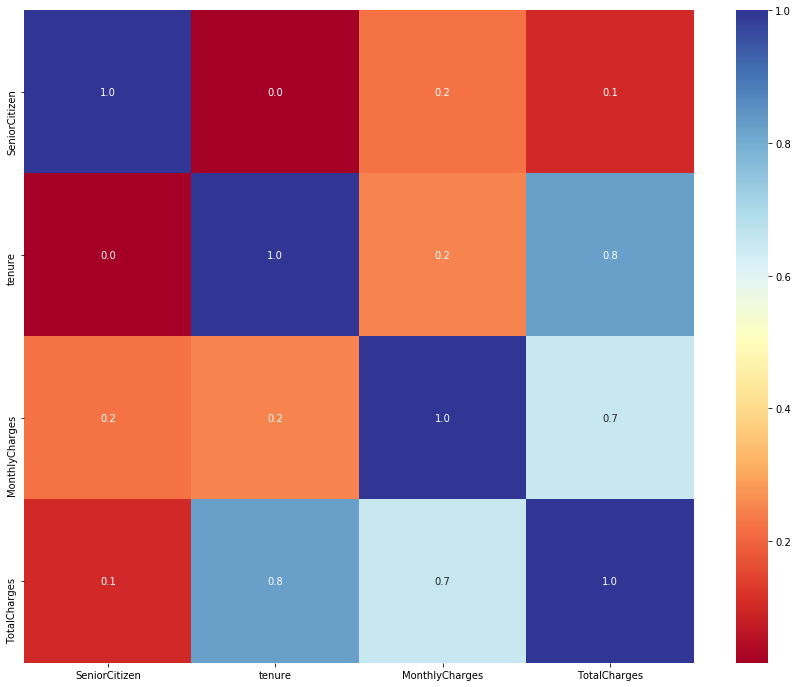

In [8]:
#correlation between numerical data
df2=df1.corr()
print(df2)
# lets visualise it
plt.figure(figsize = (15, 12))
sns.heatmap(df.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


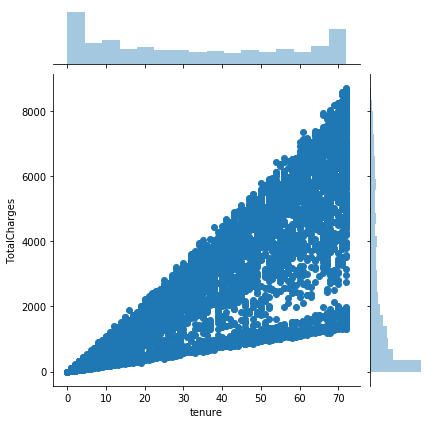

In [9]:
sns.jointplot(x="tenure", y="TotalCharges", data=df)
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


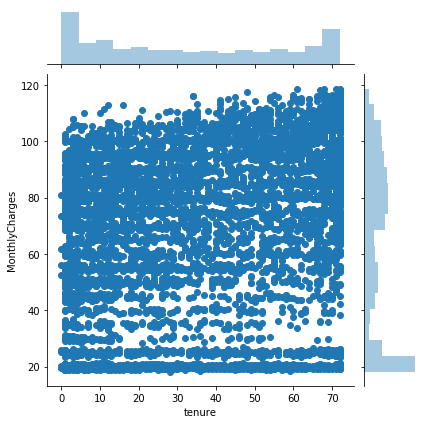

In [10]:
sns.jointplot(x="tenure", y="MonthlyCharges", data=df)
plt.show()

#### Tenure with TotalCharges has relationship but with MonthlyCharges has no significant reationship

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


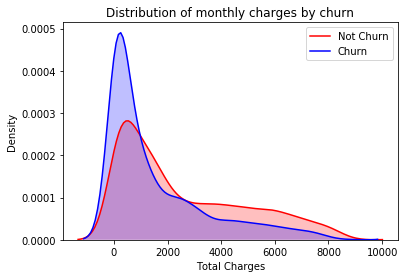

In [11]:
ax = sns.kdeplot(df['TotalCharges'][(df["Churn"] == 'No') ],color="Red", shade = True)
ax = sns.kdeplot(df['TotalCharges'][(df["Churn"] == 'Yes') ],ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


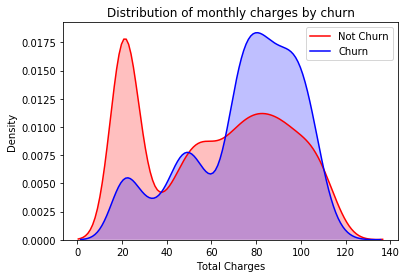

In [12]:
ax = sns.kdeplot(df['MonthlyCharges'][(df["Churn"] == 'No') ],color="Red", shade = True)
ax = sns.kdeplot(df['MonthlyCharges'][(df["Churn"] == 'Yes') ],ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


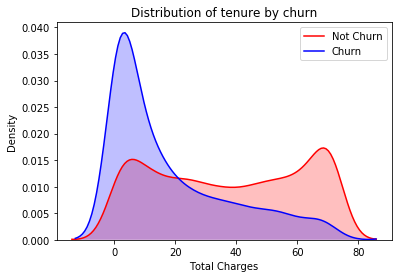

In [13]:
ax = sns.kdeplot(df['tenure'][(df["Churn"] == 'No') ],color="Red", shade = True)
ax = sns.kdeplot(df['tenure'][(df["Churn"] == 'Yes') ],ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of tenure by churn')
plt.show()

In [14]:
#lets know more about categorical data
gender=df["gender"].value_counts()
print(gender)
sc=df["SeniorCitizen"].value_counts()
print(sc)
part=df["Partner"].value_counts()
print(part)
dep=df["Dependents"].value_counts()
print(dep)
phoneSer=df["PhoneService"].value_counts()
print(phoneSer)
multi=df["MultipleLines"].value_counts()
print(multi)
intSer=df["InternetService"].value_counts()
print(intSer)
onlineSecu=df["OnlineSecurity"].value_counts()
print(onlineSecu)
onlineback=df["OnlineBackup"].value_counts()
print(onlineback)
devicepro=df["DeviceProtection"].value_counts()
print(devicepro)
techSup=df["TechSupport"].value_counts()
print(techSup)
streamtv=df["StreamingTV"].value_counts()
print(streamtv)
streammov=df["StreamingMovies"].value_counts()
print(streammov)
contract=df["Contract"].value_counts()
print(contract)
paperbill=df["PaperlessBilling"].value_counts()
print(paperbill)
paymentmeth=df["PaymentMethod"].value_counts()
print(paymentmeth)


Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

#### There are six binary features (four yes or no,one male or female and one 0 or 1) , 9 featues with three categories and one feature with four categories

In [15]:
#Lets ckeck churn and non-churn data
churn_cat = df['Churn'].value_counts() 
churn_cat

No     5174
Yes    1869
Name: Churn, dtype: int64

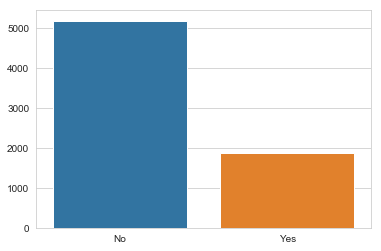

In [16]:
sns.set_style("whitegrid")
churn_cat=sns.barplot(churn_cat.index, churn_cat.values)

There are 5174 customers not belong to churn and 1869 customers belong to churn

## SeniorCitizen with Gender

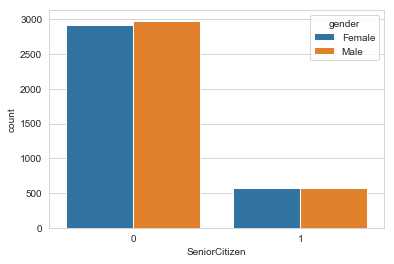

In [17]:
sns.set_style("whitegrid")
sns.countplot(x="SeniorCitizen",hue="gender",data=df)
plt.show()

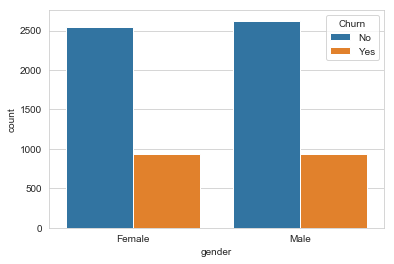

In [18]:
sns.set_style("whitegrid")
sns.countplot(x="gender",hue="Churn",data=df)
plt.show()

####  Gender of customer does not provide any indication of churn

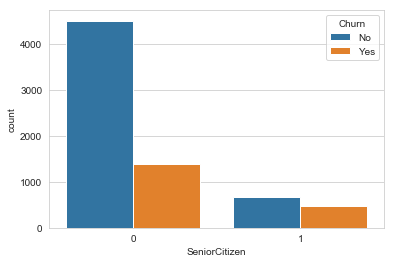

In [19]:
sns.set_style("whitegrid")
sns.countplot(x="SeniorCitizen",hue="Churn",data=df)
plt.show()

#### Senior Citizens has higher churn rate then non Senior Citizen

## Partner and dependents

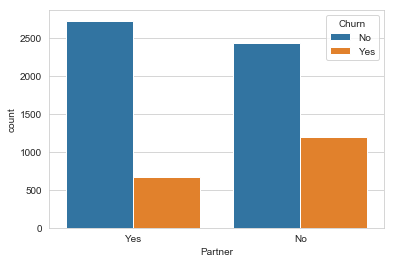

In [20]:
sns.set_style("whitegrid")
sns.countplot(x="Partner",hue="Churn",data=df)
plt.show()

#### Customers who have partners are less likely to churn

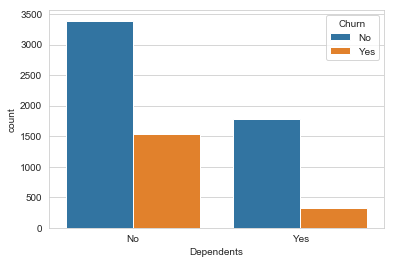

In [21]:
sns.countplot(x="Dependents",hue="Churn",data=df)
plt.show()

#### Dependent customers have less churn rate but independent customers have churn rate 

## Phone Services

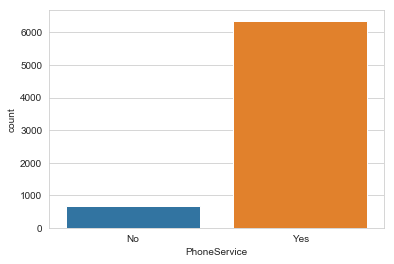

In [22]:
sns.set_style("whitegrid")
sns.countplot(x="PhoneService",data=df)
plt.show()

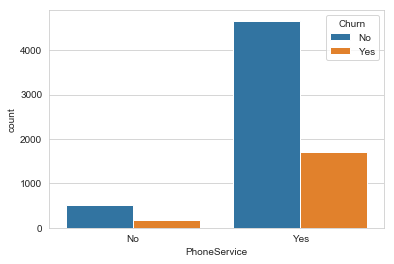

In [23]:
sns.set_style("whitegrid")
sns.countplot(x="PhoneService",hue="Churn",data=df)
plt.show()

#### Majority of customers have phone services and customers who have phone services are more likely to churn

## MultipleLines

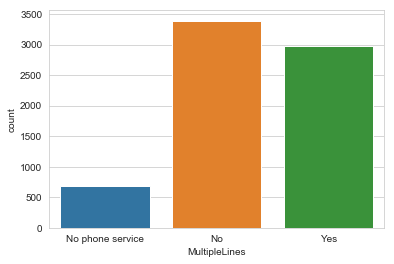

In [24]:
sns.set_style("whitegrid")
sns.countplot(x="MultipleLines",data=df)
plt.show()

#### customers with Multiple Lines have slightly hiegher churn rate

## Internet Service

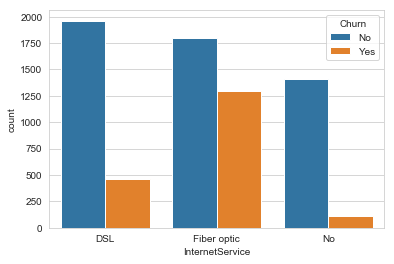

In [25]:
sns.set_style("whitegrid")
sns.countplot(x="InternetService",hue="Churn",data=df)
plt.show()

#### Customers with no internet services have  lowest churn rate but  customers with Fiber optic have higher  churn rate then customers who have DSL. 

## More Services related with internet

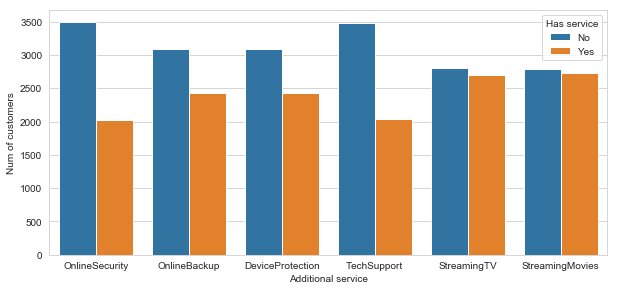

In [26]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()


#### Graph shows number of customers with respect of each services

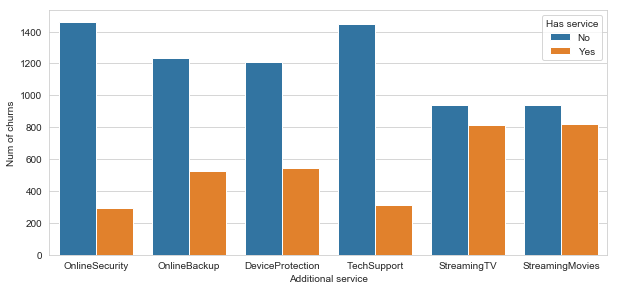

In [27]:
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

#### Graph shows numbers of customers to be churn with respect of services

#### OnlineSecurity,OnlineBachup,DeviceProtection and TechSupport are likely less churn but StreamingTV and Streaming Movies are not usefull for churn

## Contract

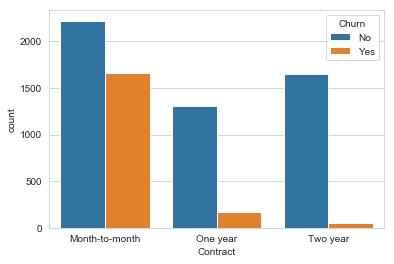

In [28]:
sns.set_style("whitegrid")
sns.countplot(x="Contract",hue="Churn",data=df)
plt.show()

#### New Customers are more likely to churn 

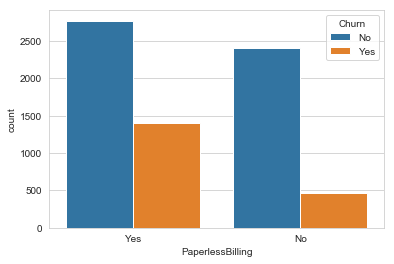

In [29]:
sns.set_style("whitegrid")
sns.countplot(x="PaperlessBilling",hue="Churn",data=df)
plt.show()

#### Customers with PaperlessBilling have more chance to churn 

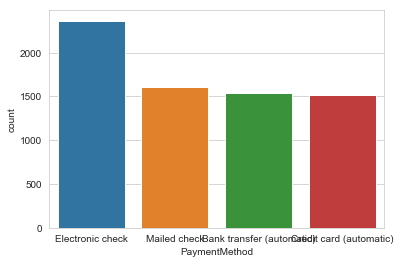

In [30]:
sns.set_style("whitegrid")
sns.countplot(x="PaymentMethod",data=df)
plt.show()

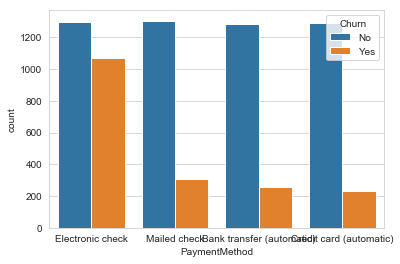

In [31]:
sns.set_style("whitegrid")
sns.countplot(x="PaymentMethod",hue="Churn",data=df)
plt.show()

#### Customers having Electronic ckeck paymentmethods are more to churn

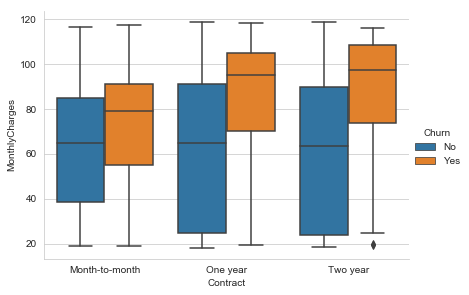

In [32]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)

#### Longer contract customers with higher Monthly charge have slighlty more churn rate

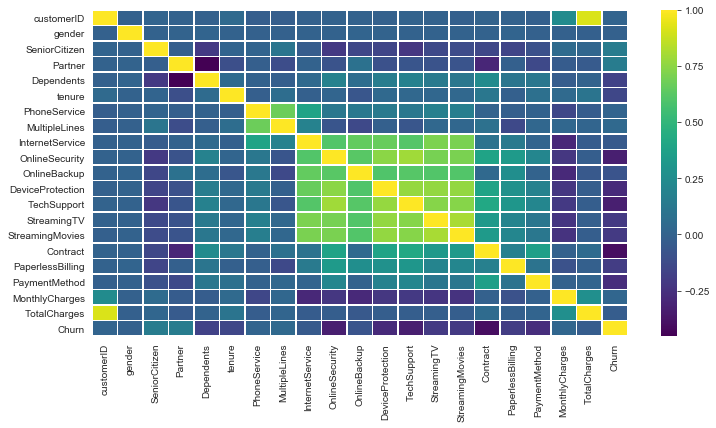

In [33]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.5,cmap="viridis")